# Ukeoppgaver – Førsteordens ODE og numeriske metoder
Tema for denne uken er
- Retningsfelt
- Eulers metode
- Lokal og global feil
- Runge-Kutta metoder (Euler, midtpunktsmetoden og RK4)
- Stive problemer
- Konvergens

---

## Oppgaver for hånd

### **Oppgave 1 – Tolke et retningsfelt**
Et retningsfelt for en differensiallikning er vist nedenfor:

![](fasediagram.png)

Differensiallikningen er gitt ved  
$y' = y - x$.

1. Marker punktene $(0,0)$, $(1,1)$ og $(0,1)$ i planet.  
2. Tegn pilene som viser stigning $y' = y - x$ ved disse punktene.  
3. Bruk pilene til å skissere tre tilnærmede løsningskurver som starter i disse punktene.  
4. Diskuter hvordan startverdien påvirker løsningen.



---

### **Oppgave 2 – Ett steg med Eulers metode**
Vi skal løse $y' = y - x^2 + 1$, med $y(0)=0.5$ og steglengde $h=0.2$.

1. Bruk Eulers metode til å beregne $y_1$, $y_2$, og $y_3$.  
2. Sammenlign med den eksakte løsningen  
   $y(x) = (x+1)^2 - 0.5e^x$  
   og beregn feilen etter hvert steg.
3. Hva er forskjellen på global og lokal feil i stegene over?

---

### **Oppgave 3 – Sammenligning av Euler og Midtpunktsmetoden**
For likningen $y' = y$, med $y(0)=1$, bruk:
- Eulers metode med $h=0.5$
- Midtpunktsmetoden (Runge-Kutta 2) med $h=0.5$

Beregn $y(1)$ i begge tilfeller, og sammenlign med den eksakte løsningen $y(x)=e^x$.  
Diskuter hvorfor den ene metoden er mer nøyaktig.


---
## Digitale oppgaver
### **Oppgave 4 – Visualisere retningsfelt**
Lag en funksjon som tegner retningsfeltet for en gitt $y'=f(x,y)$ ved hjelp av `matplotlib`.

Eksempel:  
$y'=f(x,y) = x - y$

1. Velg x- og y-verdier
2. Lag to matriser med x- og y-verdier for koordinatsystemet ditt (`np.meshgrid`)
3. Regn ut y'=f(x,y) for hvert punkt
4. Tegn retningsfeltet for $x,y \in [-3,3]$.

*Hint:* Bruk `plt.quiver` for å plotte små piler.

Text(0.5, 1.0, "Retningsdiagram til differensiallikningen y'=x-y")

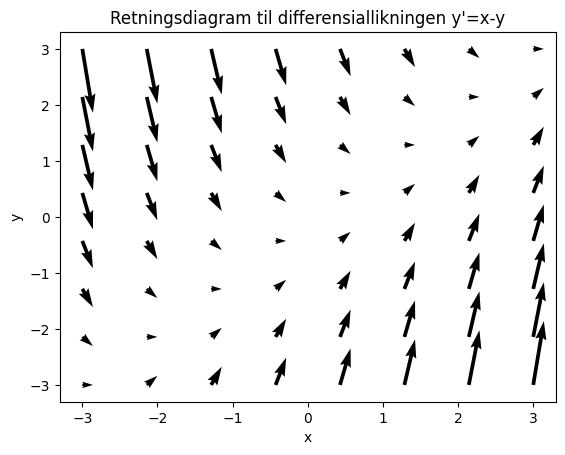

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def y_derivert(x, y):
    return x - y 

x0, x1 = -3, 3
y0, y1 = -3, 3
n = 8

xs = np.linspace(x0, x1, n)
ys = np.linspace(y0, y1, n)
x2, y2 = np.meshgrid(xs, ys)

dx = np.ones(np.shape(x2))
dy = y_derivert(x2, y2)

fig, ax = plt.subplots()
ax.quiver(x2, y2, dx, dy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Retningsdiagram til differensiallikningen y\'=x-y')



### **Oppgave 5 – Eulers metode i kode**
Implementer Eulers metode for likningen  
$y' = y - x^2 + 1$, med $y(0)=0.5$ og $h=0.1$ opp til $x=2$.  

1. Implementer Eulers metode

Her kan det være nyttig å lage en funksjon som gjennomfører Eulers metode. Funksjonen din kan ta inn følgende argumenter:
- Funksjonen $y'=f(x,y)$
- Startverdier $x_0$ og $y_0$.
- Antall steg $n$
- Sluttverdi $x_{stopp}$

2. Plott den numeriske løsningen sammen med den eksakte:  
   $y(x) = (x+1)^2 - 0.5e^x$.  
3. Beregn den globale feilen som funksjon av $x$.  
4. Reduser steglengden og observer hvordan feilen endrer seg.



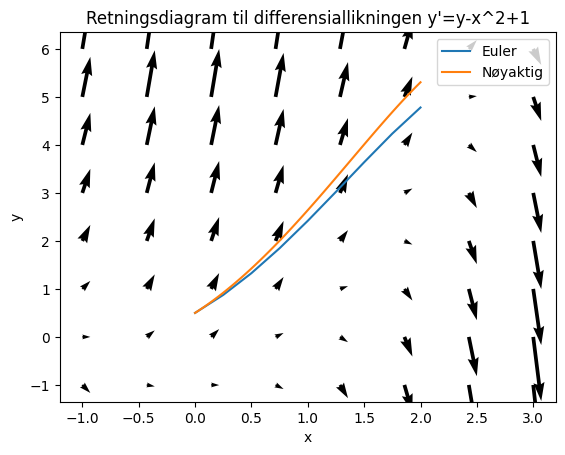

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def y_derivert(x, y):
    return y - x**2 + 1

def eulers_metode(y_derivert, x0, y0, h, x_stopp):
    x = x0 
    xs = [x0]
    ys = [y0]
    h = (x_stopp - x0)/n
    for i in range(n):
        # Gjør ett steg
        y = y0 + h*y_derivert(x0, y0)
        x = x0 + h
        # Oppdater variablene
        y0 = y 
        x0 = x

        # Lagre variablene
        xs.append(x0)
        ys.append(y0)

    return xs, ys

# Eulers metode
x0 = 0
y0 = 0.5
h = 0.1
x_stopp = 2
x_euler, y_euler = eulers_metode(y_derivert, x0, y0, n, x_stopp)

# Nøyaktig
x_nøyaktig = np.linspace(x0, x_stopp)
y_nøyaktig = (x_nøyaktig+1)**2 - 0.5*np.exp(x_nøyaktig)



# Lag retningsdiagram
x0, x1 = -1, 3
y0, y1 = -1, 6
n = 8

xs = np.linspace(x0, x1, n)
ys = np.linspace(y0, y1, n)
x2, y2 = np.meshgrid(xs, ys)

dx = np.ones(np.shape(x2))
dy = y_derivert(x2, y2)

fig, ax = plt.subplots()
ax.quiver(x2, y2, dx, dy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Retningsdiagram til differensiallikningen y\'=y-x^2+1')

# Tegn løsninger
ax.plot(x_euler, y_euler, label='Euler')
ax.plot(x_nøyaktig, y_nøyaktig, label='Nøyaktig')
ax.legend()

### **Oppgave 6 – Sammenlign RK2 og RK4**
Lag et program som løser $y' = 1-y-5e^{-4x}$ med $y(0)=1$ fra $x=0$ til $x=1$ med  
- Eulers metode  
- Midtpunktsmetoden (RK2)  
- Runge-Kutta 4 (RK4)

1. Plott alle tre løsninger i samme figur.  
2. Beregn feilen ved $x=1$ mot eksakt løsning  
   $y(x) = 1 + \frac{5}{3} e^{4x} + Ce^{-x}$, med riktig $C$ (regn den ut).  
3. Kommenter konvergensraten.

Feilen til Eulers metode : 0.2996004306166461
Feilen til Midtpunktsmetoden : 0.04036114134532348
Feilen til RK4 : 1.4967823046496687e-05


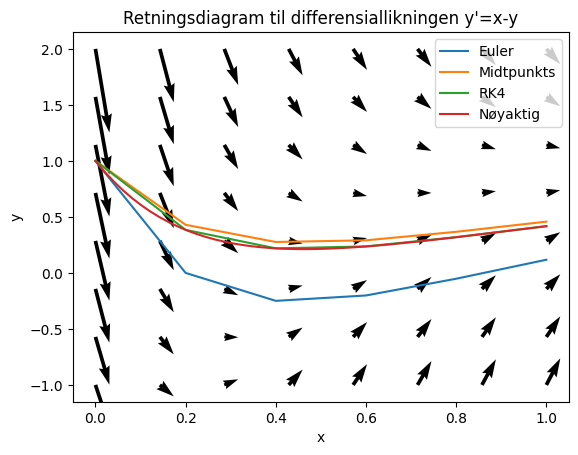

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def y_derivert(x, y):
    return 1*(1-y) - 5*np.exp(-4*x)

def eulers_metode(y_derivert, x0, y0, n, x_stopp):
    x = x0 
    xs = [x0]
    ys = [y0]
    h = (x_stopp - x0)/n
    for i in range(n):
        # Gjør ett steg
        y = y0 + h*y_derivert(x0, y0)
        x = x0 + h
        # Oppdater variablene
        y0 = y 
        x0 = x

        # Lagre variablene
        xs.append(x0)
        ys.append(y0)

    return xs, ys

def midtpunkts_metode(y_derivert, x0, y0, n, x_stopp):
    x = x0 
    xs = [x0]
    ys = [y0]
    h = (x_stopp - x0)/n
    for i in range(n):
        # Gjør et halvt steg
        y_half = y0 + h/2*y_derivert(x0, y0)
        x_half = x0 + h/2 

        # Tar et helt steg med midtpunktsmetoden
        y = y0 + h*y_derivert(x_half, y_half)
        x = x0 + h

        # Oppdater variablene
        y0 = y 
        x0 = x

        # Lagre variablene
        xs.append(x0)
        ys.append(y0)

    return xs, ys


def RK4_metode(y_derivert, x0, y0, n, x_stopp):
    x = x0 
    xs = [x0]
    ys = [y0]
    h = (x_stopp - x0)/n
    for i in range(n):
        # Finner de 4 delstegene i RK4
        k1 = y_derivert(x0    , y0         ) 
        k2 = y_derivert(x0+h/2, y0 + h/2*k1)
        k3 = y_derivert(x0+h/2, y0 + h/2*k2)
        k4 = y_derivert(x0+h  , y0 + h*k3)

        # Tar et helt steg med RK4
        y = y0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x = x0 + h

        # Oppdater variablene
        y0 = y 
        x0 = x

        # Lagre variablene
        xs.append(x0)
        ys.append(y0)

    return xs, ys

def y(x):
    return 5/3*np.exp(-4*x) - 5/3*np.exp(-x) + 1

# Numerikk
x0 = 0
y0 = 1
n = 5 # Antall steg
x_stopp = 1

# Euler
x_euler, y_euler = eulers_metode(y_derivert, x0, y0, n, x_stopp)

# Midtpunkts
x_midt, y_midt = midtpunkts_metode(y_derivert, x0, y0, n, x_stopp)

#RK4
x_RK4, y_RK4 = RK4_metode(y_derivert, x0, y0, n, x_stopp)

# Nøyaktig
x_nøyaktig = np.linspace(x0, x_stopp)
y_nøyaktig = 1 + 5/(3*np.exp(4*x_nøyaktig)) - 5/(3*np.exp(x_nøyaktig))


# Feil 
feil_euler = np.abs(y_euler[-1] - y_nøyaktig[-1])
feil_midt  = np.abs(y_midt[-1]  - y_nøyaktig[-1])
feil_RK4   = np.abs(y_RK4[-1]   - y_nøyaktig[-1])

print(f'Feilen til Eulers metode : {feil_euler}')
print(f'Feilen til Midtpunktsmetoden : {feil_midt}')
print(f'Feilen til RK4 : {feil_RK4}')

# Lag retningsdiagram
x0, x1 = 0, 1
y0, y1 = -1, 2
n = 8

xs = np.linspace(x0, x1, n)
ys = np.linspace(y0, y1, n)
x2, y2 = np.meshgrid(xs, ys)

dx = np.ones(np.shape(x2))
dy = y_derivert(x2, y2)

fig, ax = plt.subplots()
ax.quiver(x2, y2, dx, dy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Retningsdiagram til differensiallikningen y\'=x-y')

# Tegn løsninger
ax.plot(x_euler, y_euler, label='Euler')
ax.plot(x_midt, y_midt, label='Midtpunkts')
ax.plot(x_RK4, y_RK4, label='RK4')
ax.plot(x_nøyaktig, y_nøyaktig, label='Nøyaktig')
ax.legend()

### **Oppgave 7 – Stivt problem**
Et stivt system kan føre til ustabilitet ved store steg.

Studer likningen  
$y' = -15y$ med $y(0)=5$.  

For $x\in[0,1]$

1. Tegn retningsdiagrammet til differensiallikningen. 
2. Løs numerisk med Eulers metode for $h=0.01, 0.05, 0.1, 0.2$.  
3. Tegn estimatene dine i retningsdiagrammet, og sammenlign med eksakt løsning $y(x) = e^{-15x}$.  
4. Hva observerer du om stabilitet og konvergens?

Feilen til Eulers metode : 0.004881282988397491
Feilen til Midtpunktsmetoden : 0.0454732055770439
Feilen til RK4 : 1.0153390872435324e-05


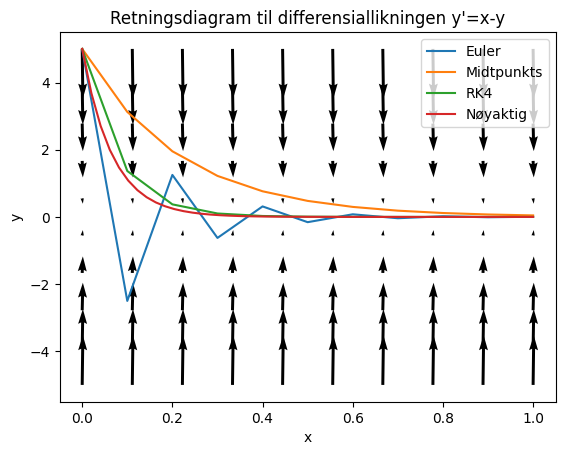

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def y_derivert(x, y):
    return -15*y

def y(x):
    return 5*np.exp(-15*x)

# Numerikk
x0 = 0
y0 = 5
n = 10 # Antall steg
x_stopp = 1

# Euler
x_euler, y_euler = eulers_metode(y_derivert, x0, y0, n, x_stopp)

# Midtpunkts
x_midt, y_midt = midtpunkts_metode(y_derivert, x0, y0, n, x_stopp)

#RK4
x_RK4, y_RK4 = RK4_metode(y_derivert, x0, y0, n, x_stopp)

# Nøyaktig
x_nøyaktig = np.linspace(x0, x_stopp)
y_nøyaktig = y(x_nøyaktig)


# Lag retningsdiagram
x0, x1 = 0, 1
y0, y1 = -5, 5
n = 10

xs = np.linspace(x0, x1, n)
ys = np.linspace(y0, y1, n)
x2, y2 = np.meshgrid(xs, ys)

dx = np.ones(np.shape(x2))
dy = y_derivert(x2, y2)

fig, ax = plt.subplots()
ax.quiver(x2, y2, dx, dy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Retningsdiagram til differensiallikningen y\'=x-y')

# Tegn løsninger
ax.plot(x_euler, y_euler, label='Euler')
ax.plot(x_midt, y_midt, label='Midtpunkts')
ax.plot(x_RK4, y_RK4, label='RK4')
ax.plot(x_nøyaktig, y_nøyaktig, label='Nøyaktig')
ax.legend()